# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии.

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**[1].** Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [45]:
data = pd.read_csv('datasets/weights_heights.csv', index_col='Index')

Посмотрим на первые записи данных

In [46]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


**[2]** Построим гистограммы распределения роста и веса подростков из выборки *data*. Используем метод *plot* для DataFrame *data*

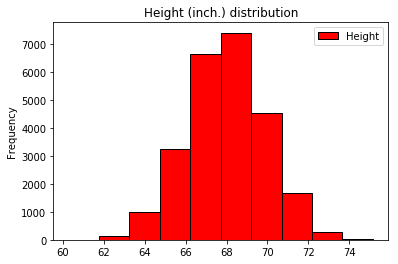

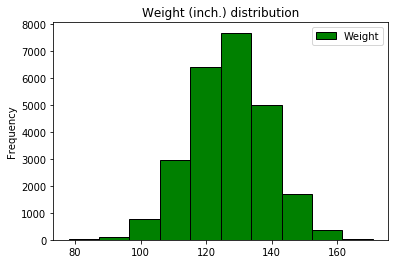

In [47]:
data.plot(y='Height', kind='hist', color='red',  title='Height (inch.) distribution', edgecolor='black')
data.plot(y='Weight', kind='hist', color='green', title='Weight (inch.) distribution', edgecolor='black')
plt.show()

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет
- *edgecolor='black'* - цвет границ

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [48]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [49]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

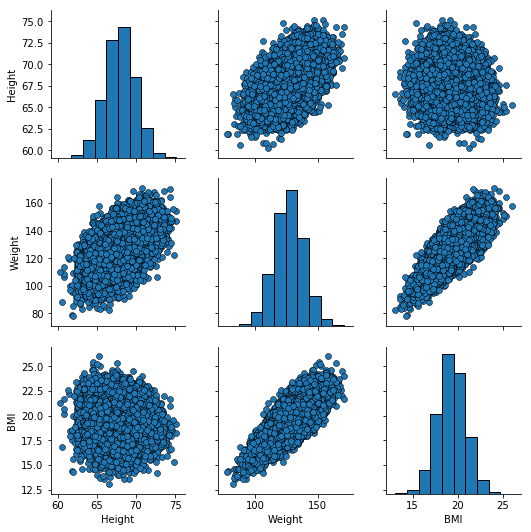

In [50]:
sns.pairplot(data, diag_kws=dict(edgecolor='black'), plot_kws=dict(edgecolor='black', linewidth=0.5))
plt.show()

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

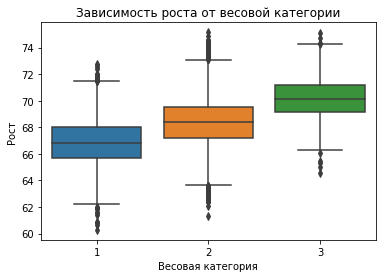

In [51]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
ax = sns.boxplot(x=data['weight_cat'], y=data['Height'])
ax.set_xlabel('Весовая категория')
ax.set_ylabel('Рост')
ax.set_title('Зависимость роста от весовой категории')
plt.show()

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

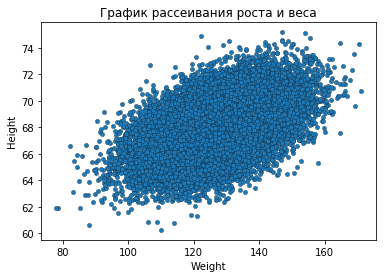

In [52]:
data.plot(x='Weight', y='Height', kind='scatter', edgecolor='black', linewidth=0.2, 
               title='График рассеивания роста и веса')
plt.show()

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [53]:
def squared_error(w0, w1):
    err = 0;
    for _, row in data.iterrows():
        err += (row['Height'] - (w0 + w1*row['Weight']))**2
    return err

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

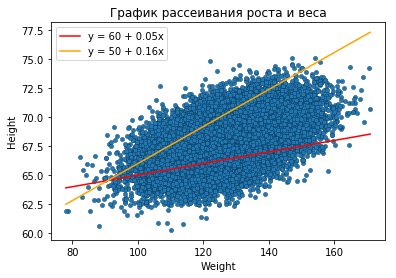

In [54]:
w00, w01 = 60, 0.05
w10, w11 = 50, 0.16
x = np.linspace(data['Weight'].min(), data['Weight'].max(), 1000)
y0 = w00 + w01*x
y1 = w10 + w11*x

data.plot(x='Weight', y='Height', kind='scatter', edgecolor='black', linewidth=0.2, 
               title='График рассеивания роста и веса')
plt.plot(x, y0, label=f'y = {w00} + {w01}x', color='red')
plt.plot(x, y1, label=f'y = {w10} + {w11}x', color='orange')
plt.legend()
plt.show()

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

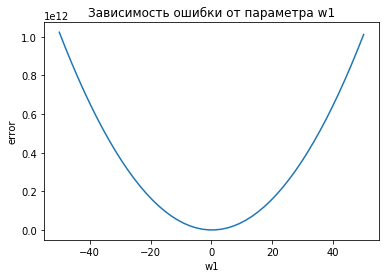

In [55]:
w1 = np.linspace(-50, 50, 50)
err = [squared_error(50, w) for w in w1]
plt.plot(w1, err)
plt.xlabel('w1')
plt.ylabel('error')
plt.title('Зависимость ошибки от параметра w1')
plt.show()


Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [63]:
from scipy.optimize import minimize_scalar
opt_res = minimize_scalar(lambda w1: squared_error(50, w1), bounds=(-5, 5))
w1_opt = opt_res.x

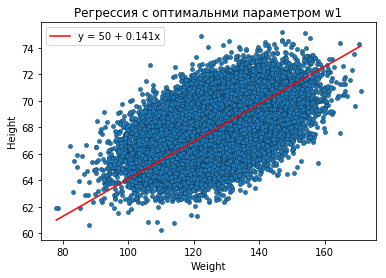

In [64]:
data.plot(x='Weight', y='Height', kind='scatter', edgecolor='black', linewidth=0.2, 
               title='Регрессия с оптимальнми параметром w1')
x = np.linspace(data['Weight'].min(), data['Weight'].max(), 1000)
y = 50 + w1_opt*x
plt.plot(x, y, color='red', label=f'y = 50 + {w1_opt:.3}x')
plt.legend()
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

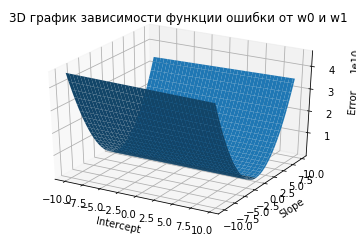

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
W0 = np.arange(-10, 10, 0.25)
W1 = np.arange(-10, 10, 0.25)
W0, W1 = np.meshgrid(W0, W1)
ERR = squared_error(W0, W1)

surf = ax.plot_surface(W0, W1, ERR)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
ax.set_title('3D график зависимости функции ошибки от w0 и w1')
plt.show()

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [59]:
from scipy.optimize import minimize
f = lambda w: squared_error(w[0], w[1])
opt_res = minimize(f, x0=(0, 0), bounds=((-100, 100), (-5, 5)), method='L-BFGS-B')
w0_opt, w1_opt = opt_res.x[0], opt_res.x[1]
print(f'w0_opt = {w0_opt}\nw1_opt = {w1_opt}')

w0_opt = 57.57175421319638
w1_opt = 0.08200666202355257


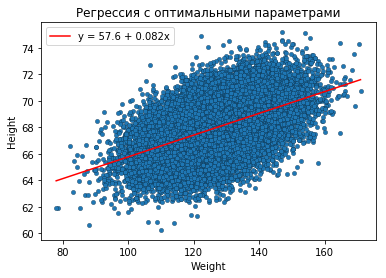

In [61]:
data.plot(x='Weight', y='Height', kind='scatter', edgecolor='black', linewidth=0.2, 
               title='Регрессия с оптимальными параметрами')
x = np.linspace(data['Weight'].min(), data['Weight'].max(), 1000)
y = w0_opt + w1_opt*x
plt.plot(x, y, color='red', label=f'y = {w0_opt:.3} + {w1_opt:.3}x')
plt.legend()
plt.show()
